In [1]:
import rdkit
from rdkit import Chem
import openfe
import networkx as nx
from openfe import SmallMoleculeComponent

In [2]:
sdfs = Chem.SDMolSupplier('nik/aligned.sdf', removeHs=False)

ligands = [SmallMoleculeComponent(sdf) for sdf in sdfs]

In [3]:
mapper = openfe.LomapAtomMapper(max3d=1.0, element_change=True, threed=True)
scorer = openfe.lomap_scorers.default_lomap_score
network_planner = openfe.ligand_network_planning.generate_maximal_network
#network_planner = openfe.ligand_network_planning.generate_minimal_spanning_network

In [4]:
ligand_network = network_planner(
                 ligands = ligands[0:],
                 mappers = [mapper],
                 scorer = scorer)


  0%|          | 4/5460 [00:03<1:18:59,  1.15it/s]

In [6]:
G = nx.Graph()

In [7]:
for edge in ligand_network.edges:
    G.add_edge(edge.componentA.name, edge.componentB.name, weight=edge.annotations['score'])

In [8]:
#G.edges(data=True)

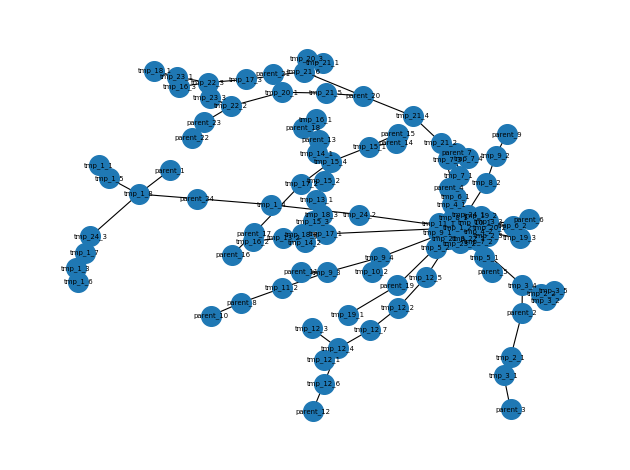

In [9]:
## plotting ------------------
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

## nodes
nx.draw_networkx_nodes(G, pos, node_size=200)

## edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.8)

## node labels
nx.draw_networkx_labels(G, pos, font_size=5, font_family="sans-serif")

## edge weight labels
#edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
import math
## copy the graph
H = G.copy()

## change the edge values

for u, v, data in H.edges(data=True):
    try:
        data['weight'] = -math.log(data['weight'])
    except: ValueError
        

In [11]:
nodes = []
for node in G.nodes():
    if node[0:3] == 'par':
        nodes.append(node)
    else:
        None

In [12]:
nodes.sort()
#nodes

In [14]:
for n in range(len(nodes)):
    if n + 1 < len(nodes):
        print(nodes[n])
        print('==========')
        for m in range(n+1, len(nodes)):
            if m !=n :
                print(f'{nodes[n]} <--> {nodes[m]}:')
                all_paths = list(nx.all_simple_paths(H, source=nodes[n], target=nodes[m], cutoff=10))
                print('Number of available paths: ', str(len(all_paths)))
                print(all_paths)
                for path in range(len(all_paths)):
                    pathGraph = nx.path_graph(all_paths[path])
                    print('Length of path: ', str(pathGraph.number_of_edges()))
                    weights = []
                    weights.clear()
                    for ea in pathGraph.edges():
                        #print(ea, '=> LOMAP Similarity: ', G.edges[ea[0], ea[1]])
                        ## get negative logarithm edge scores
                        weights.append(H.edges[ea[0], ea[1]]['weight'])
                    print('final score: ' + str(round(sum(weights) / pathGraph.number_of_edges(), 4)))
                    print('----------')    
            else:
                print('Both nodes are same')
                print('--------------------')


parent_1
parent_1 <--> parent_10:
Number of available paths:  1
[['parent_1', 'tmp_1_8', 'parent_24', 'tmp_1_4', 'tmp_24_2', 'tmp_1_2', 'tmp_9_4', 'tmp_9_3', 'tmp_11_2', 'parent_8', 'parent_10']]
Length of path:  10
final score: 0.9
----------
parent_1 <--> parent_11:
Number of available paths:  1
[['parent_1', 'tmp_1_8', 'parent_24', 'tmp_1_4', 'tmp_24_2', 'tmp_1_2', 'tmp_9_4', 'tmp_9_3', 'parent_11']]
Length of path:  8
final score: 0.9375
----------
parent_1 <--> parent_12:
Number of available paths:  0
[]
parent_1 <--> parent_13:
Number of available paths:  0
[]
parent_1 <--> parent_14:
Number of available paths:  0
[]
parent_1 <--> parent_15:
Number of available paths:  0
[]
parent_1 <--> parent_16:
Number of available paths:  0
[]
parent_1 <--> parent_17:
Number of available paths:  0
[]
parent_1 <--> parent_18:
Number of available paths:  0
[]
parent_1 <--> parent_19:
Number of available paths:  1
[['parent_1', 'tmp_1_8', 'parent_24', 'tmp_1_4', 'tmp_24_2', 'tmp_1_2', 'tmp_5_2',

In [ ]:
## --------- old-trials -------------

In [11]:
for path in nx.all_simple_paths(G, source='parent_1', target='parent_2', cutoff=10):
    print(path)

['parent_1', 'tmp_1_8', 'parent_19', 'tmp_3_2', 'tmp_3_4', 'parent_2']


In [93]:
## least sum of weights
sp = nx.shortest_path(G, source='parent_1', target='parent_2', weight='weight', method='dijkstra')
sp

['parent_1', 'tmp_1_8', 'parent_19', 'tmp_3_2', 'tmp_3_4', 'parent_2']

In [94]:
pathGraph = nx.path_graph(sp)

for ea in pathGraph.edges():
    print(ea, G.edges[ea[0], ea[1]])

('parent_1', 'tmp_1_8') {'weight': 0.1826835240527346}
('tmp_1_8', 'parent_19') {'weight': 0.8187307530779818}
('parent_19', 'tmp_3_2') {'weight': 0.8187307530779818}
('tmp_3_2', 'tmp_3_4') {'weight': 0.7408182206817179}
('tmp_3_4', 'parent_2') {'weight': 0.7408182206817179}


In [95]:
import math
## copy the graph
H = G.copy()

## change the edge values

for u, v, data in H.edges(data=True):
    #data['weight'] = -math.log(data['weight'])
    data['weight'] = math.exp(-data['weight'])

In [96]:
sp1 = nx.shortest_path(H, source='parent_1', target='parent_2', weight='weight', method='dijkstra')
sp1

['parent_1', 'tmp_1_8', 'parent_19', 'tmp_3_2', 'tmp_3_4', 'parent_2']

In [97]:
pathGraph = nx.path_graph(sp1)

for ea in pathGraph.edges():
    print(ea, H.edges[ea[0], ea[1]])
    print(ea, '=> LOMAP Similarity: ', G.edges[ea[0], ea[1]])

('parent_1', 'tmp_1_8') {'weight': 0.8330317485362206}
('parent_1', 'tmp_1_8') => LOMAP Similarity:  {'weight': 0.1826835240527346}
('tmp_1_8', 'parent_19') {'weight': 0.4409910259429827}
('tmp_1_8', 'parent_19') => LOMAP Similarity:  {'weight': 0.8187307530779818}
('parent_19', 'tmp_3_2') {'weight': 0.4409910259429827}
('parent_19', 'tmp_3_2') => LOMAP Similarity:  {'weight': 0.8187307530779818}
('tmp_3_2', 'tmp_3_4') {'weight': 0.4767236907145941}
('tmp_3_2', 'tmp_3_4') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_3_4', 'parent_2') {'weight': 0.4767236907145941}
('tmp_3_4', 'parent_2') => LOMAP Similarity:  {'weight': 0.7408182206817179}


In [98]:
nodes = []
for node in G.nodes():
    if node[0:3] == 'par':
        nodes.append(node)
    else:
        None
        #print(node)
#nodes

In [100]:
for n in range(len(nodes)):
    if n + 1 < len(nodes):
        print(nodes[n])
        print('==========')
        for m in range(len(nodes)):
            if m !=n :
                sp2 = nx.shortest_path(H, source=nodes[n], target=nodes[m], weight='weight', method='dijkstra')
                pathGraph = nx.path_graph(sp2)
                print('----------')
                for ea in pathGraph.edges():
                    print(ea, '=> LOMAP Similarity: ', G.edges[ea[0], ea[1]])
            else:
                print('Both nodes are same')


parent_11
Both nodes are same
----------
('parent_11', 'tmp_9_3') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_9_3', 'parent_5') => LOMAP Similarity:  {'weight': 0.7788007830714049}
('parent_5', 'tmp_5_1') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_5_1', 'tmp_9_4') => LOMAP Similarity:  {'weight': 0.951229424500714}
('tmp_9_4', 'tmp_4_1') => LOMAP Similarity:  {'weight': 0.951229424500714}
('tmp_4_1', 'tmp_8_2') => LOMAP Similarity:  {'weight': 0.951229424500714}
('tmp_8_2', 'tmp_7_1') => LOMAP Similarity:  {'weight': 0.951229424500714}
('tmp_7_1', 'tmp_7_4') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_7_4', 'parent_4') => LOMAP Similarity:  {'weight': 0.9048374180359595}
----------
('parent_11', 'tmp_9_3') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_9_3', 'parent_5') => LOMAP Similarity:  {'weight': 0.7788007830714049}
('parent_5', 'tmp_5_1') => LOMAP Similarity:  {'weight': 0.7408182206817179}
('tmp_5_1', 'tmp_9_4') => LOMAP

In [101]:
openfe.__version__

'0.14.0+54.g68a08d2'

In [105]:
nodes.sort()